In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Chargement des données
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation des images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape pour le modèle CNN (ajout de la dimension de canal)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Conversion des labels en catégories (one-hot encoding)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Chargement des données
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation des images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape pour le modèle CNN (ajout de la dimension de canal)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Conversion des labels en catégories (one-hot encoding)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [4]:
# Informations sur le dataset
print(f"Forme des images d'entraînement : {x_train.shape}")
print(f"Nombre d'images d'entraînement : {x_train.shape[0]}")


Forme des images d'entraînement : (60000, 28, 28, 1)
Nombre d'images d'entraînement : 60000


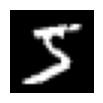

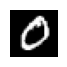

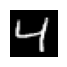

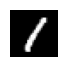

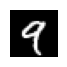

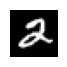

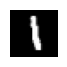

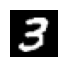

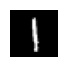

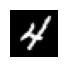

In [5]:
# Visualisation de quelques images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


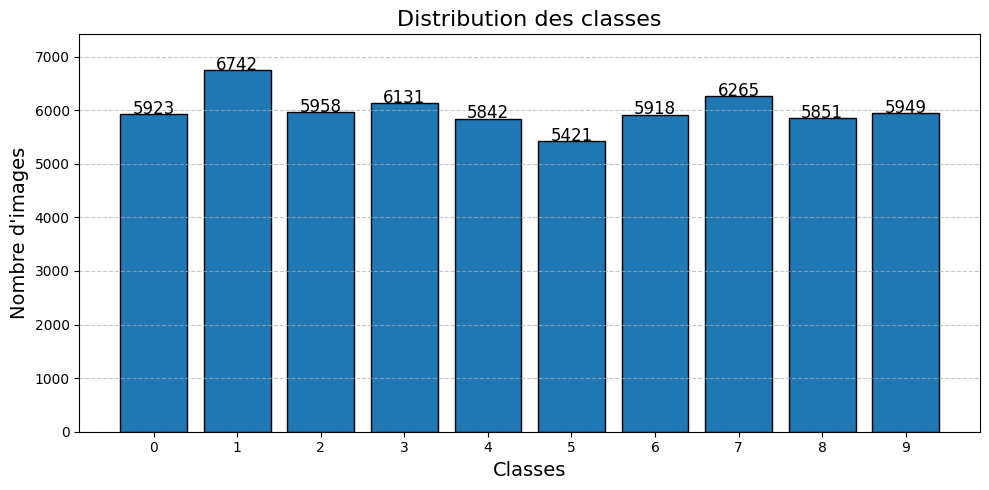

In [6]:
# Distribution des classes
classes = np.argmax(y_train, axis=1)  # Convertit les one-hot en classes
classes_uniques, comptage = np.unique(classes, return_counts=True)  # Compte les occurrences

# Création du graphique
plt.figure(figsize=(10, 5))
plt.bar(classes_uniques, comptage, edgecolor='black')

# Ajout du titre et des labels
plt.title('Distribution des classes', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Nombre d\'images', fontsize=14)

# Affichage des étiquettes sous chaque barre
plt.xticks(classes_uniques, labels=classes_uniques)  # Affiche les indices des classes sous les barres

# Affichage du nombre exact d'images au-dessus des barres
for idx, compt in zip(classes_uniques, comptage):
    plt.text(idx, compt + 5, str(compt), ha='center', fontsize=12)

plt.ylim(0, comptage.max() * 1.1)  # Ajuste la plage de l'axe des y avec une marge
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille horizontale pour une meilleure lisibilité
plt.tight_layout()
plt.show()


In [7]:
print(classes_uniques)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
modele = keras.Sequential([
# Première couche convolutive
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Deuxième couche convolutive
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Couche de mise à plat
        layers.Flatten(),

        # Couches fully connected
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),

        # Couche de sortie
        layers.Dense(10, activation='softmax')
    ])

# Compilation du modèle
modele.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
modele.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Callback pour early stopping
early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

# Entraînement
historique = modele.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

# Évaluation sur les données de test
resultats_test = modele.evaluate(x_test, y_test, verbose=0)
print(f"\nPrécision sur les données de test : {resultats_test[1]*100:.2f}%")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7787 - loss: 0.6842 - val_accuracy: 0.9754 - val_loss: 0.0794
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9557 - loss: 0.1530 - val_accuracy: 0.9849 - val_loss: 0.0561
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9691 - loss: 0.1049 - val_accuracy: 0.9872 - val_loss: 0.0427
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9747 - loss: 0.0854 - val_accuracy: 0.9897 - val_loss: 0.0398
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9761 - loss: 0.0780 - val_accuracy: 0.9894 - val_loss: 0.0395
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9802 - loss: 0.0682 - val_accuracy: 0.9908 - val_loss: 0.0401
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9828 - loss: 0.0572 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9841 - loss: 0.0507 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


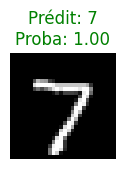

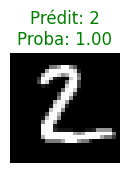

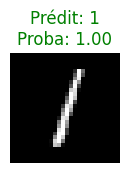

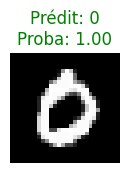

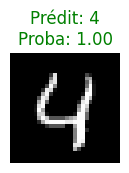

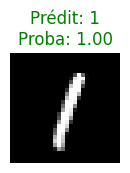

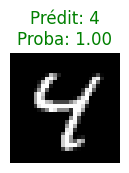

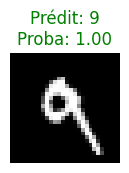

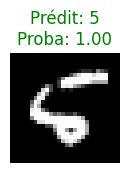

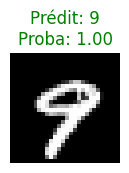

In [11]:
# Prédictions
predictions = modele.predict(x_test[:10])

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Chiffre prédit
    chiffre_predit = np.argmax(predictions[i])
    probabilite = np.max(predictions[i])

    # Chiffre réel
    chiffre_reel = np.argmax(y_test[i])

    # Titre avec prédiction et probabilité
    couleur = 'green' if chiffre_predit == chiffre_reel else 'red'
    plt.title(f'Prédit: {chiffre_predit}\nProba: {probabilite:.2f}', color=couleur)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

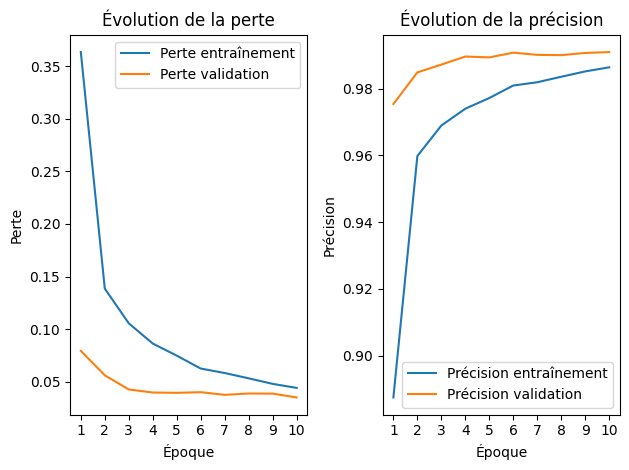

In [12]:
import matplotlib.pyplot as plt

# Définir les époques de 1 à 10
epochs = range(1, 11)  # Plage des époques de 1 à 10

# Perte
plt.subplot(1, 2, 1)
plt.plot(epochs, historique.history['loss'][:10], label='Perte entraînement')
plt.plot(epochs, historique.history['val_loss'][:10], label='Perte validation')
plt.xticks(epochs)  # Affiche les époques de 1 à 10
plt.title('Évolution de la perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

# Précision
plt.subplot(1, 2, 2)
plt.plot(epochs, historique.history['accuracy'][:10], label='Précision entraînement')
plt.plot(epochs, historique.history['val_accuracy'][:10], label='Précision validation')
plt.xticks(epochs)  # Affiche les époques de 1 à 10
plt.title('Évolution de la précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


Explicabilité,

In [14]:
layer = modele.get_layer('conv2d_1')
filters, biases = layer.get_weights()

print("Filters shape:", filters.shape)

Filters shape: (3, 3, 32, 64)


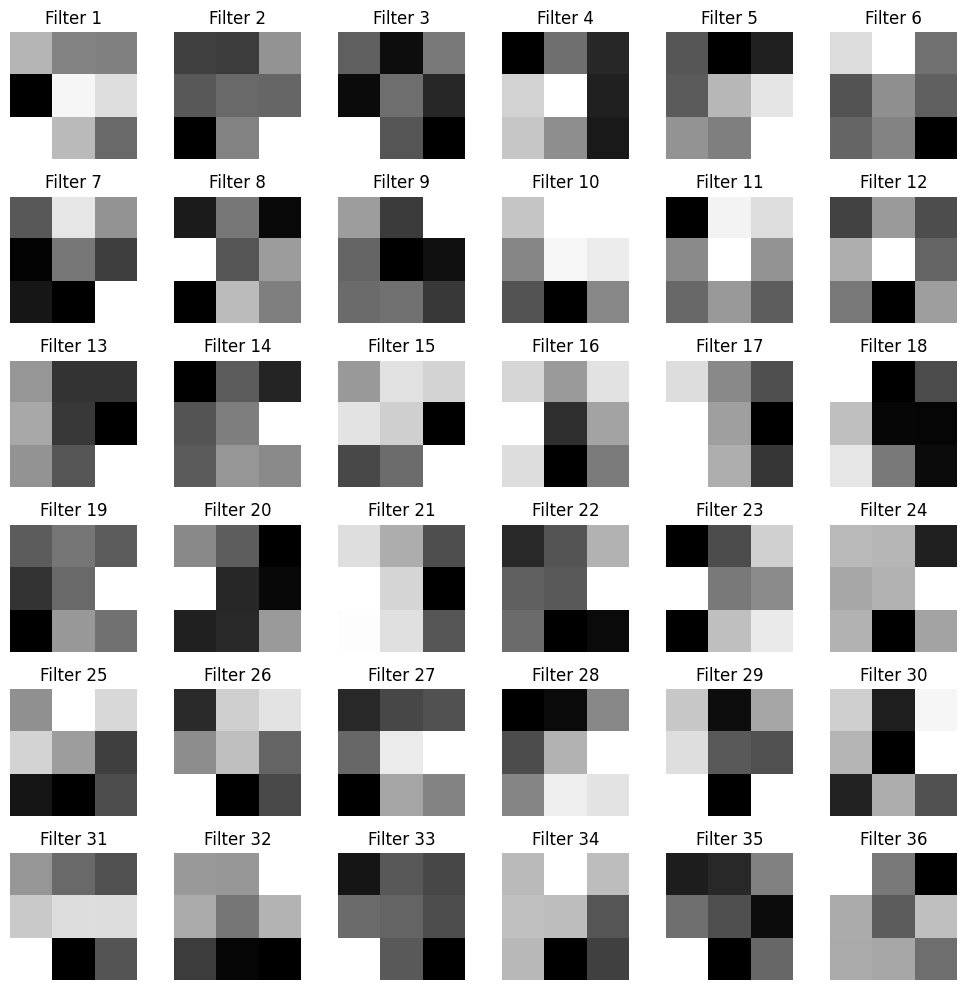

In [15]:
# Plot only the first 36 filters (adjust for larger number of filters)
n_filters = min(filters.shape[-1], 36)  # Limit to 36 filters
plt.figure(figsize=(10, 10))
for i in range(n_filters):
    f = filters[:, :, 0, i]  # Extract the i-th filter (for grayscale images, 0th channel)
    plt.subplot(6, 6, i + 1)  # Display filters in a 6x6 grid
    plt.imshow(f, cmap='gray')  # Plot filter as grayscale image
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.tight_layout()
plt.show()


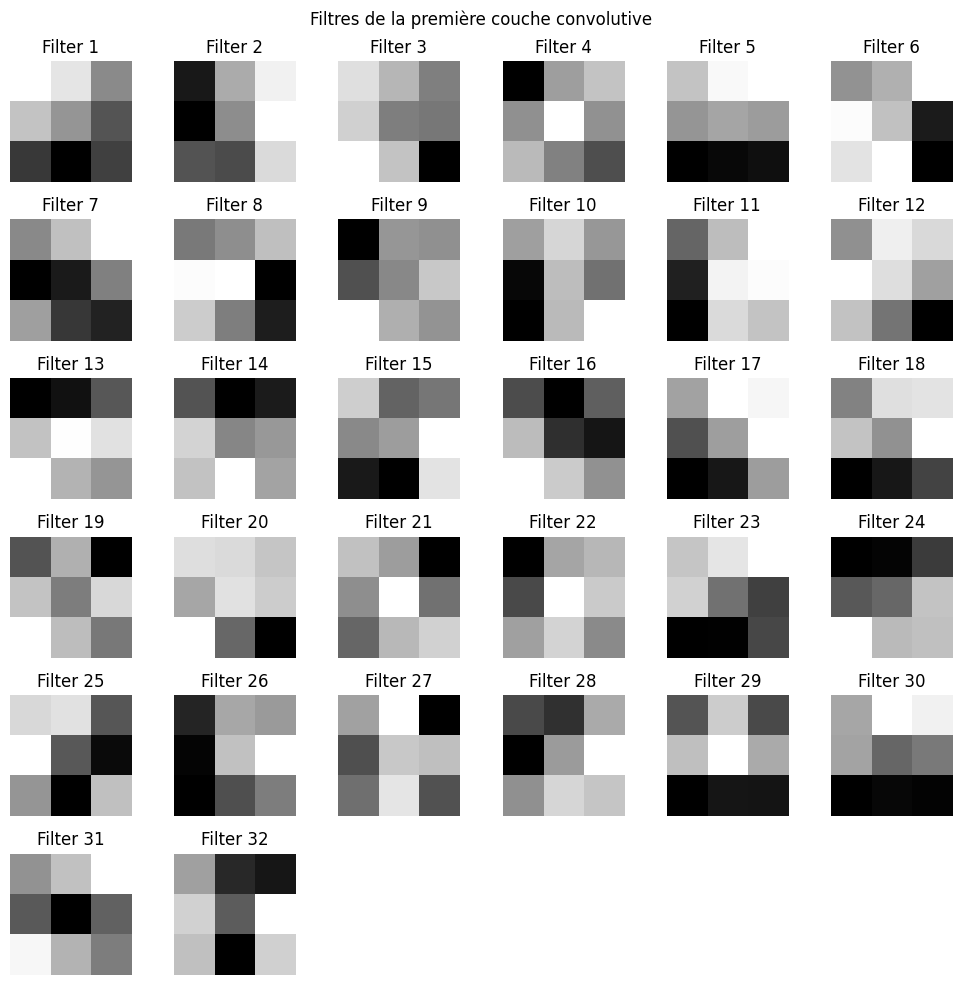

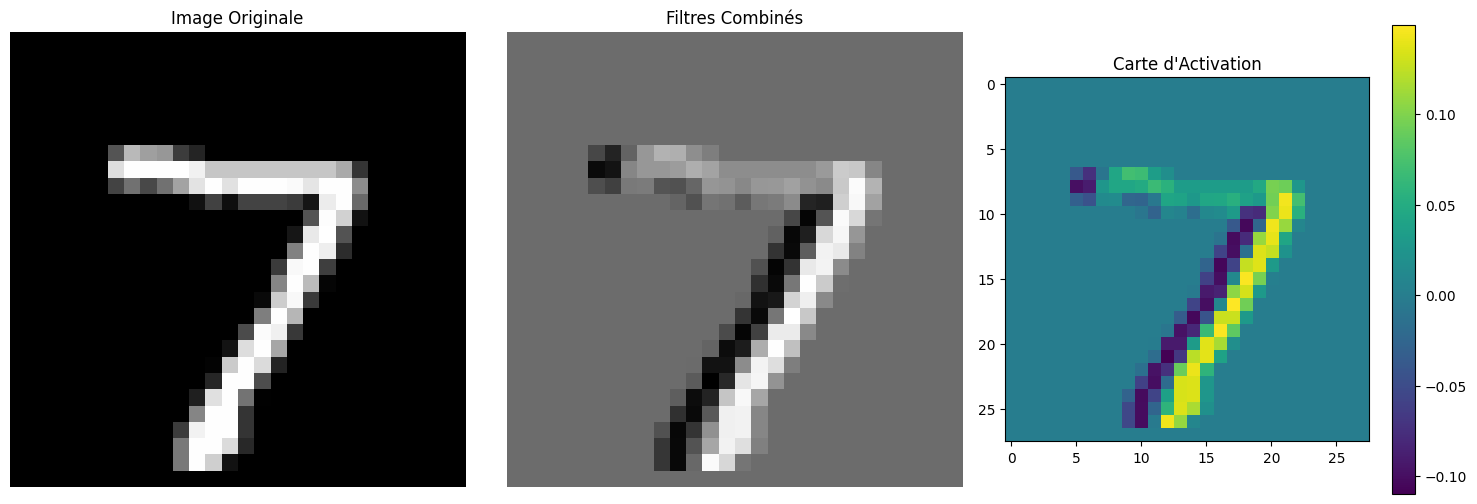

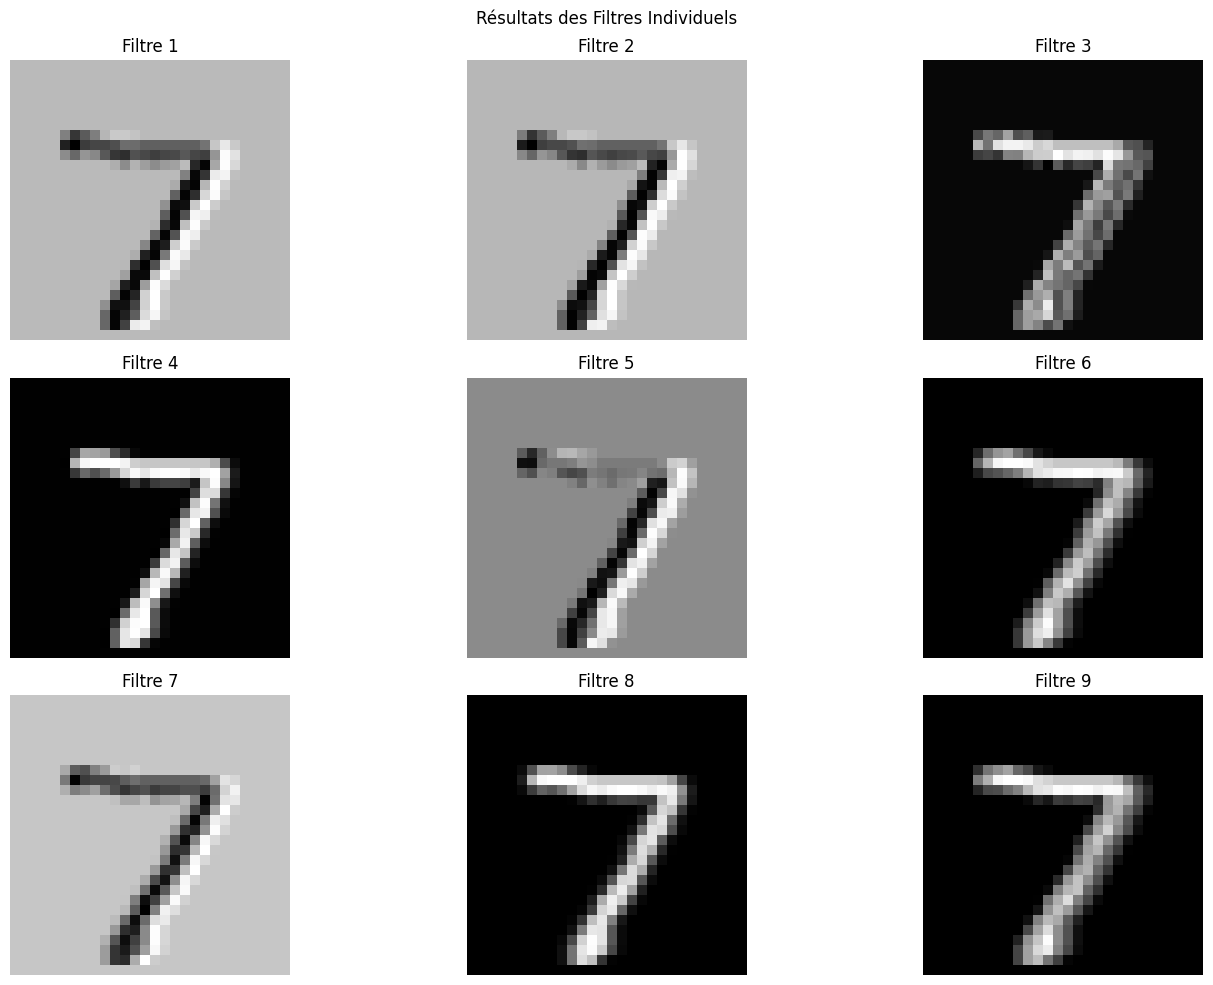

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

# Sélectionner une image
sample_image = x_test[0]

# Récupérer les filtres de la première couche convolutive
first_conv_layer = modele.layers[0]
filters = first_conv_layer.get_weights()[0]

# Visualiser les filtres
n_filters = min(filters.shape[-1], 36)  # Limit to 36 filters
plt.figure(figsize=(10, 10))
for i in range(n_filters):
    f = filters[:, :, 0, i]  # Extract the i-th filter
    plt.subplot(6, 6, i + 1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.suptitle("Filtres de la première couche convolutive")
plt.tight_layout()
plt.show()

# Appliquer les filtres à l'image
plt.figure(figsize=(15, 5))

# Image originale
plt.subplot(1, 3, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Image Originale')
plt.axis('off')

# Image avec quelques filtres appliqués
plt.subplot(1, 3, 2)
filtered_images = []
for i in range(min(9, n_filters)):
    # Appliquer le filtre via convolution
    filtered = tf.nn.conv2d(sample_image[tf.newaxis, ..., tf.newaxis],
                             filters[:, :, 0:1, i:i+1],
                             strides=1,
                             padding='SAME')[0]
    filtered_images.append(filtered.numpy().squeeze())

# Afficher la combinaison des images filtrées
combined_filtered = np.mean(filtered_images, axis=0)
plt.imshow(combined_filtered, cmap='gray')
plt.title('Filtres Combinés')
plt.axis('off')

# Carte de chaleur des activations
plt.subplot(1, 3, 3)
plt.imshow(combined_filtered, cmap='viridis')
plt.title('Carte d\'Activation')
plt.colorbar()

plt.tight_layout()
plt.show()

# Visualisation détaillée des filtres individuels
plt.figure(figsize=(15, 10))
for i in range(min(9, n_filters)):
    plt.subplot(3, 3, i+1)
    filtered = tf.nn.conv2d(sample_image[tf.newaxis, ..., tf.newaxis],
                             filters[:, :, 0:1, i:i+1],
                             strides=1,
                             padding='SAME')[0]
    plt.imshow(filtered.numpy().squeeze(), cmap='gray')
    plt.title(f'Filtre {i+1}')
    plt.axis('off')
plt.suptitle('Résultats des Filtres Individuels')
plt.tight_layout()
plt.show()

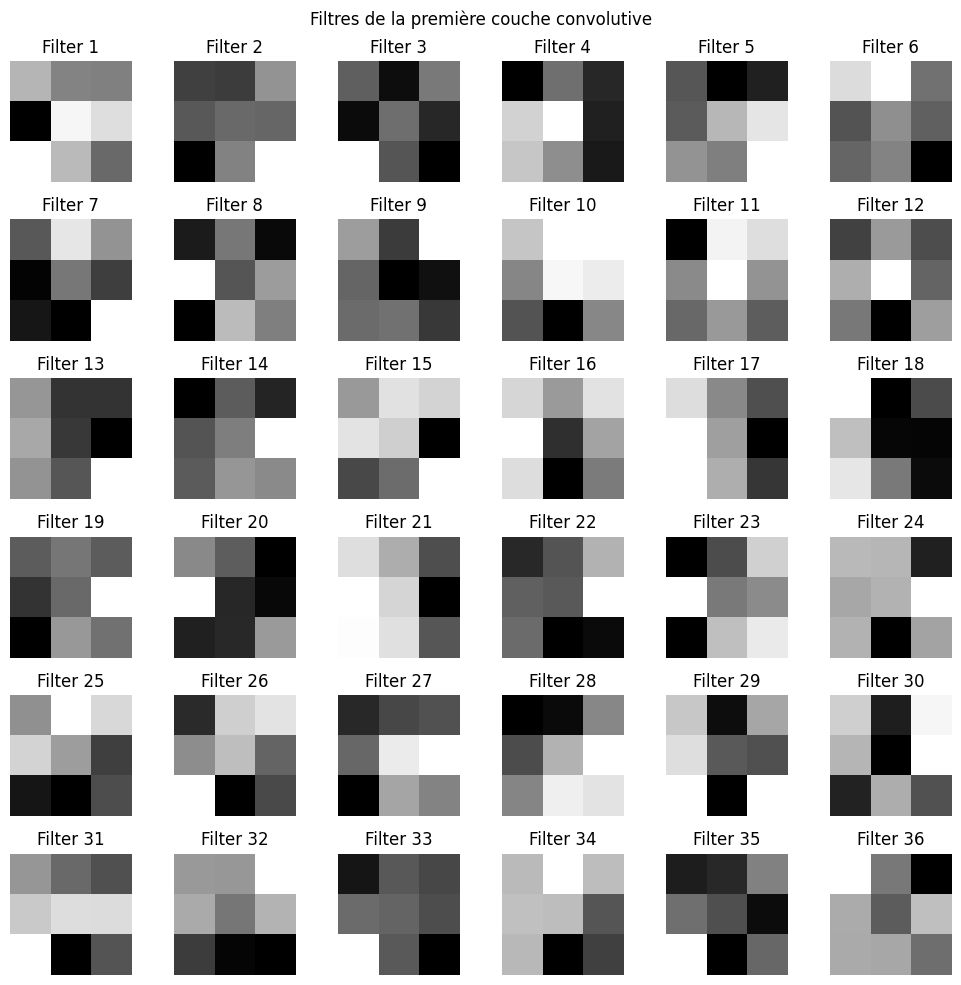

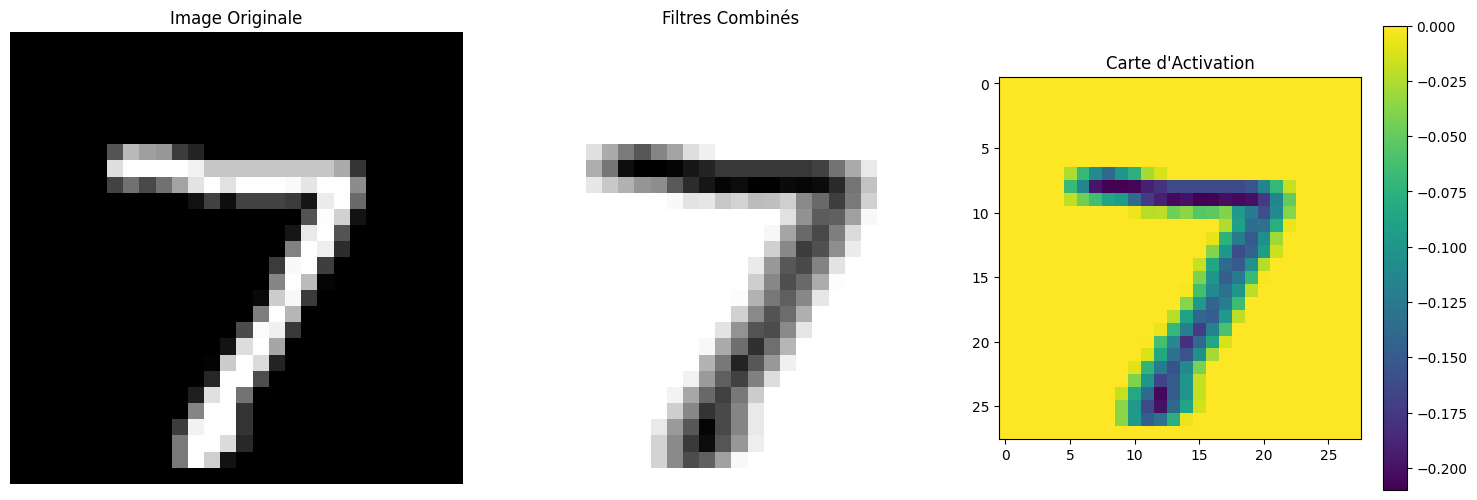

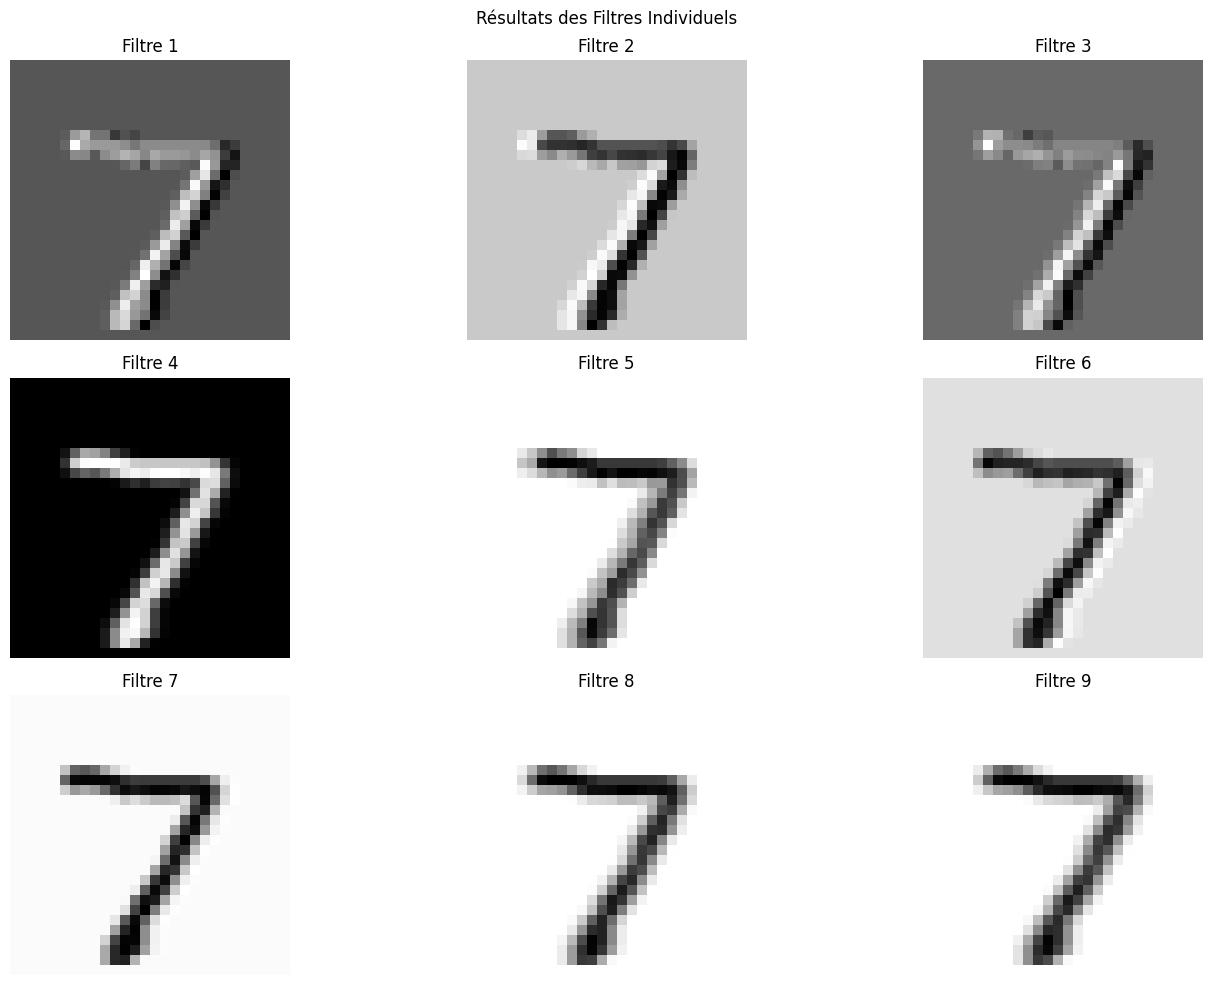

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

# Sélectionner une image
sample_image = x_test[0]

# Récupérer les filtres de la première couche convolutive
first_conv_layer = modele.layers[2]
filters = first_conv_layer.get_weights()[0]

# Visualiser les filtres
n_filters = min(filters.shape[-1], 36)  # Limit to 36 filters
plt.figure(figsize=(10, 10))
for i in range(n_filters):
    f = filters[:, :, 0, i]  # Extract the i-th filter
    plt.subplot(6, 6, i + 1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.suptitle("Filtres de la première couche convolutive")
plt.tight_layout()
plt.show()

# Appliquer les filtres à l'image
plt.figure(figsize=(15, 5))

# Image originale
plt.subplot(1, 3, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Image Originale')
plt.axis('off')

# Image avec quelques filtres appliqués
plt.subplot(1, 3, 2)
filtered_images = []
for i in range(min(9, n_filters)):
    # Appliquer le filtre via convolution
    filtered = tf.nn.conv2d(sample_image[tf.newaxis, ..., tf.newaxis],
                             filters[:, :, 0:1, i:i+1],
                             strides=1,
                             padding='SAME')[0]
    filtered_images.append(filtered.numpy().squeeze())

# Afficher la combinaison des images filtrées
combined_filtered = np.mean(filtered_images, axis=0)
plt.imshow(combined_filtered, cmap='gray')
plt.title('Filtres Combinés')
plt.axis('off')

# Carte de chaleur des activations
plt.subplot(1, 3, 3)
plt.imshow(combined_filtered, cmap='viridis')
plt.title('Carte d\'Activation')
plt.colorbar()

plt.tight_layout()
plt.show()

# Visualisation détaillée des filtres individuels
plt.figure(figsize=(15, 10))
for i in range(min(9, n_filters)):
    plt.subplot(3, 3, i+1)
    filtered = tf.nn.conv2d(sample_image[tf.newaxis, ..., tf.newaxis],
                             filters[:, :, 0:1, i:i+1],
                             strides=1,
                             padding='SAME')[0]
    plt.imshow(filtered.numpy().squeeze(), cmap='gray')
    plt.title(f'Filtre {i+1}')
    plt.axis('off')
plt.suptitle('Résultats des Filtres Individuels')
plt.tight_layout()
plt.show()